## 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

A Classification Decision Tree is a machine learning algorithm that addresses problems where the goal is to classify items or events into predefined categories or classes based on their features or attributes. It works by splitting the data into subsets based on feature values, forming a tree-like structure where each node represents a decision based on a feature, and the leaves represent the final class labels.

Key Characteristics of Problems Addressed:

Categorical Output: The target variable has discrete categories or labels.

Feature-Based Decisions: Classification depends on one or more independent features.

Nonlinear Relationships: It can model nonlinear relationships between features and the target variable.

Interpretable: The model is interpretable, with a clear decision-making process.

Real-World Applications:

Healthcare:

Diagnosing diseases: Classifying patients as having a certain disease or not based on symptoms, test results, and medical history. Predicting the severity or progression of conditions like diabetes, cancer, or heart disease.

Customer Segmentation:
Classifying customers into groups like loyal, at-risk, or new customers based on their behavior, purchase history, and demographics.

Fraud Detection:
Identifying fraudulent transactions in banking or e-commerce platforms based on transaction patterns, locations, and user behavior.

Education:
Predicting student performance: Classifying students as likely to pass or fail based on attendance, participation, and grades.
Identifying students at risk of dropping out.

Marketing:
Targeting advertisements by classifying users into interest categories based on their online activity.
Predicting click-through rates or engagement for different types of campaigns.

Human Resources:
Classifying job applicants as qualified or unqualified based on resumes and test results.
Predicting employee churn: Classifying employees likely to leave the organization.

Sentiment Analysis:
Classifying text or reviews as positive, neutral, or negative sentiment.

Cybersecurity:
Intrusion detection: Classifying network traffic as normal or suspicious.

Why Use a Decision Tree?

Ease of Understanding: Easy for humans to interpret.

Flexibility: Handles both numerical and categorical data.

Nonlinear Relationships: Does not assume a linear relationship between features and the target variable.

Efficiency: Works well with small to medium datasets.


--------------------------------------
The primary difference between how a Classification Decision Tree and Multiple Linear Regression make predictions lies in the type of predictions they produce, the underlying methodology, and the nature of the target variable they handle:

1. Nature of Predictions
Classification Decision Tree:
Output: Predicts a categorical class label (e.g., "spam" or "not spam").
Predictions are discrete and based on which leaf node the input ends up in.
Example: Predicting whether a loan will be "approved" or "rejected."
Multiple Linear Regression:
Output: Predicts a continuous numerical value (e.g., house price).
Predictions are real-valued numbers based on a linear equation.
Example: Predicting the price of a house based on size and location.

2. How Predictions are Made
Classification Decision Tree:
Starts at the root of the tree and moves through a series of decisions at each node.
Each node uses a feature and threshold (or condition) to split the data into subgroups.
At the leaf node, the predicted class is determined based on the majority class or probability distribution in that node.
Example:
Features: Age and income.
Question at root: "Is age > 30?"
Path: "Yes → Income > 50k → Class: Approved."
Multiple Linear Regression:
Predicts using a linear equation that combines the weighted contribution of each feature.
The model assumes a linear relationship between the target variable and the independent variables.

Equation:
                            y^ = β0 + β1x1 + β2x2 + ... + βnxn
                            
3. Type of Problem Solved
Classification Decision Tree:
Solves classification problems with discrete target variables (e.g., "yes" or "no," categories).
Non-parametric and can capture complex, nonlinear relationships.
Multiple Linear Regression:
Solves regression problems with continuous target variables.
Parametric model assumes linearity between predictors and the response variable.


4. Handling Data
Classification Decision Tree:
Handles categorical and numerical data natively.
Splits are determined based on criteria like Gini impurity or information gain.
Multiple Linear Regression:
Requires numerical data.
Assumes independent variables are linearly related to the dependent variable.

## 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. Accuracy
Use Case: General Classification Problems with Balanced Classes

Scenario: When the dataset has roughly balanced classes (e.g., equal numbers of positive and negative examples), and the cost of misclassification is similar for false positives and false negatives.
Example Applications:
Email classification as "spam" or "not spam," where both false positives and false negatives are equally undesirable.
Diagnosing common diseases in a general population where the disease is neither rare nor very prevalent.
Limitations:

Not suitable for imbalanced datasets, as it can give misleading results if one class dominates (e.g., 99% accuracy for a dataset with 99% negatives).
2. Sensitivity (Recall)
Use Case: Critical to Identify All Positives

Scenario: When false negatives are more harmful than false positives (i.e., missing a true positive is costly or dangerous).
Example Applications:
Medical Diagnosis: Screening for diseases like cancer, where failing to identify a sick patient can have severe consequences.
Security Systems: Detecting intrusions or threats, where missing an actual threat can lead to breaches.
Fraud Detection: Identifying fraudulent transactions, where missing fraud is costlier than flagging non-fraudulent transactions.
Limitations:

May result in more false positives if used without considering specificity.
3. Specificity
Use Case: Critical to Minimize False Alarms

Scenario: When false positives are more harmful or costly than false negatives.
Example Applications:
Medical Testing: Confirmatory tests, such as HIV confirmation, where incorrectly diagnosing someone as positive can have significant social or psychological consequences.
Spam Detection: For important emails, like job offers, where marking them as spam (false positives) is more damaging than letting a spam email through.
Legal Systems: Identifying suspects in forensic analysis, where falsely accusing an innocent person can be more damaging than failing to identify one guilty party.
Limitations:

May result in more false negatives if used without considering sensitivity.
4. Precision
Use Case: When Positive Predictions Must Be Reliable

Scenario: When the focus is on ensuring that the positives predicted by the model are truly positive (minimizing false positives).
Example Applications:
Recommendation Systems: Predicting high-value customers who are likely to respond to an offer; false positives waste resources.
Search Engines: Ensuring that retrieved documents are relevant; irrelevant results frustrate users.
Drug Discovery: Identifying candidate compounds for testing, where testing false positives wastes time and resources.
Limitations:

May result in missing some true positives (lower recall) if overly focused on precision.

## 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

ab_reduced_noNaN = ab_reduced.dropna().copy()

ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN.head()


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4


## 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

The first line creates the target variable (y) that the classifier will try to predict:

What it does:

pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"]): Converts the Hard_or_Paper column into dummy (one-hot encoded) variables. For example, if Hard_or_Paper has values like 'H' and 'P', it will create two new columns: one for 'H' and one for 'P', with binary values (0 or 1).

['H']: Selects the column corresponding to 'H' (hardcover books). This column will have 1 if the book is hardcover and 0 otherwise.
Purpose:
Converts a categorical variable (Hard_or_Paper) into a numeric format required by machine learning models.
The resulting target variable (y) is binary (0 or 1), where:
1 indicates a hardcover book.
0 indicates a paperback book.

The second line defines the feature(s) that the model will use to make predictions:

What it does:

Selects the List Price column from the DataFrame as the feature set (X).
The double square brackets ([['List Price']]) ensure X is a DataFrame (not a Series), which is the expected input format for scikit-learn models.

Purpose:

Prepares the input features that the model will use to predict whether a book is hardcover or paperback.
In this case, the only feature is the book's list price.

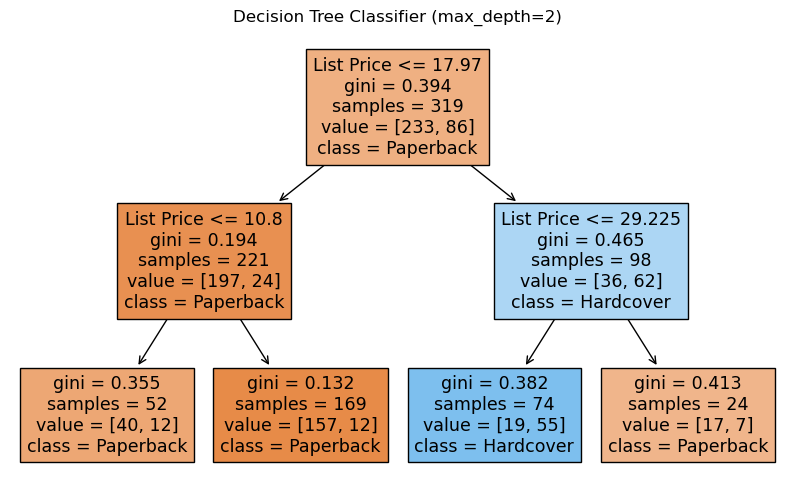

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define the target and feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 6))
tree.plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.title("Decision Tree Classifier (max_depth=2)")
plt.show()


The 80/20 train-test split resulted in:

Training Set: 255 observations

Testing Set: 64 observations

## 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

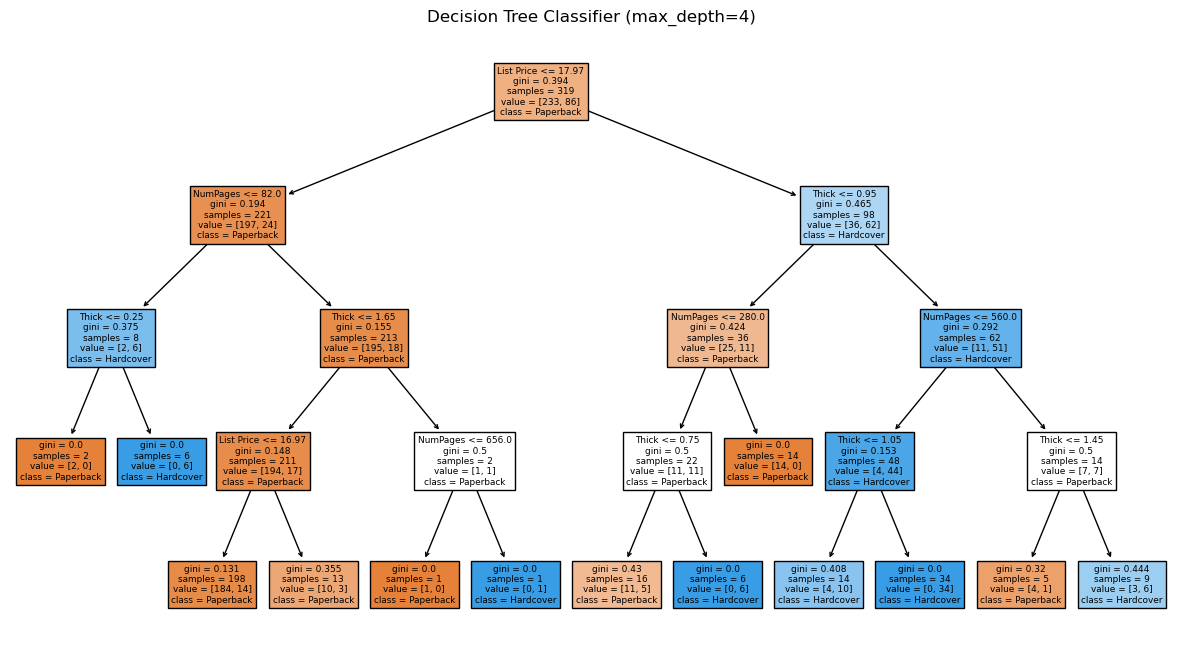

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define the feature set
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 8))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.title("Decision Tree Classifier (max_depth=4)")
plt.show()


The classification decision tree (clf2) uses the features NumPages, Thick, and List Price to make predictions. Here's how predictions are generally made for this model:

Decision Splits:
The tree evaluates conditions based on the values of the features (NumPages, Thick, and List Price) at each node.
For example, it might check whether List Price <= threshold or NumPages > threshold.

Traversal:
Starting at the root, the model follows the path determined by the feature values of a given observation, moving through the tree based on the conditions at each node.

Prediction:
Once the model reaches a leaf node, it assigns a class label (Paperback or Hardcover) based on the majority class in that region.

Depth of Decisions:
With max_depth=4, the tree allows up to 4 levels of splits, enabling finer distinctions based on the features while avoiding overfitting.
Each feature contributes differently to the decision-making process based on its relevance in separating the two classes. Let me know if you’d like further clarification or specific examples of predictions!

## 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd

# Split the data into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Define features for both models on the test set
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Make predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Calculate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])

# Calculate metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])

# Prepare results
results = {
    "Model": ["clf", "clf2"],
    "Accuracy": [accuracy_clf, accuracy_clf2],
    "Sensitivity (Recall)": [sensitivity_clf, sensitivity_clf2],
    "Specificity": [specificity_clf, specificity_clf2]
}

# Display the results in a table
results_df = pd.DataFrame(results)
print(results_df)


  Model  Accuracy  Sensitivity (Recall)  Specificity
0   clf  0.890625                  0.85     0.909091
1  clf2  0.937500                  0.90     0.954545


## 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The differences between these two confusion matrices are caused by the models' differing features. The first confusion matrix uses List Price alone, while the second adds NumPages and Thick, providing the model with more information for making predictions. The additional features in the second model improve its ability to discern patterns in the training data, potentially leading to a more accurate fit.

However, the confusion matrices for clf and clf2 (tested on the test set) are better because they reflect the models' performance on unseen data. This ensures an evaluation of how well the models generalize, whereas the confusion matrices above measure performance on the training data, which can suffer from overfitting. Models evaluated on training data alone may appear artificially better due to memorization of the training set.

## 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

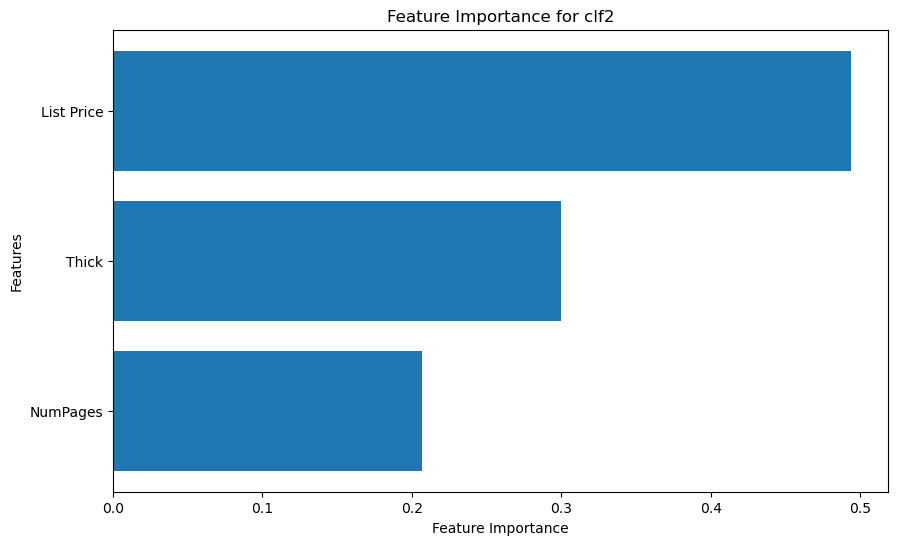

The most important predictor variable is: List Price


In [10]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for clf2')
plt.show()

most_important_feature_index = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_feature_index]

print(f"The most important predictor variable is: {most_important_feature}")


## 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, coefficients represent the direct relationship between each predictor and the target variable, assuming all other predictors are held constant. The magnitude and sign of a coefficient indicate the strength and direction of this relationship, providing a clear interpretability of how changes in a feature affect the outcome.

In contrast, feature importances in decision trees reflect the overall contribution of each feature to the model's splits across all levels of the tree. They measure how much a feature reduces impurity (e.g., Gini or entropy) in the tree but do not provide a direct or linear relationship between features and the target, making them less interpretable in terms of direct effects.

## Summary of interactions

Data Cleaning and Preparation:
Removed unnecessary columns (Weight_oz, Width, and Height).
Dropped rows with missing values.
Converted Pub year and NumPages to integers and Hard_or_Paper to a categorical type.

Train-Test Split:
Performed an 80/20 train-test split on the dataset.
The training set contained 255 observations, and the test set contained 64 observations.

Model Training and Visualization:

Trained two decision tree classifiers:
clf: Used List Price as the only feature with a maximum depth of 2.
clf2: Used NumPages, Thick, and List Price as features with a maximum depth of 4.
Visualized the decision trees using tree.plot_tree() to explain predictions.

Model Evaluation:
Computed confusion matrices, accuracy, sensitivity, and specificity for both models on the test set.
Observed that clf2 outperformed clf in all evaluation metrics due to the inclusion of more features.

Feature Importance Analysis:
Visualized feature importances for clf2 and identified List Price as the most important predictor variable.

Comparison of Interpretability:
Discussed the differences in interpreting coefficients in linear regression (direct effect) versus feature importances in decision trees (contribution to splits).

https://chatgpt.com/share/673d5497-2f30-8000-865e-590b1ead7857